In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

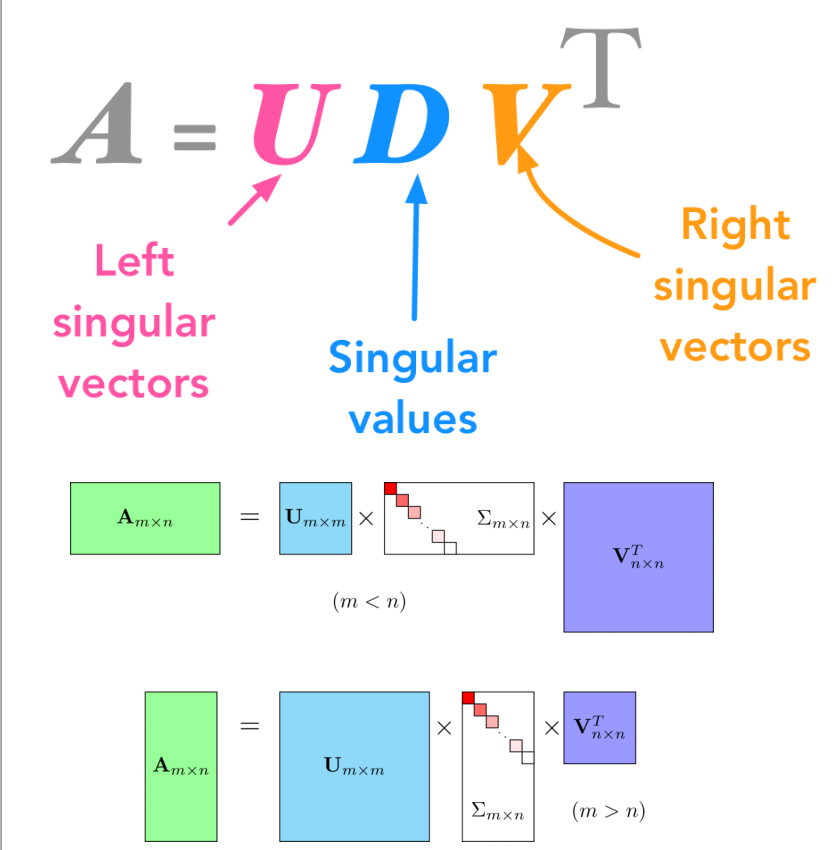


In [2]:
def compute_svd(matrix):
    U,V,V_T = np.linalg.svd(matrix)
    return U,V,V_T


In [3]:
matrix = np.array([[7, 1], [0, 0], [5, 5]])
U, S, VT = compute_svd(matrix)
S = np.diag(S)
print(U)
print(np.matrix.round(S,2))

[[-0.70710678  0.70710678  0.        ]
 [ 0.          0.         -1.        ]
 [-0.70710678 -0.70710678  0.        ]]
[[9.49 0.  ]
 [0.   3.16]]


# SVD for Compression Image( nén ảnh)

(1280, 1225)


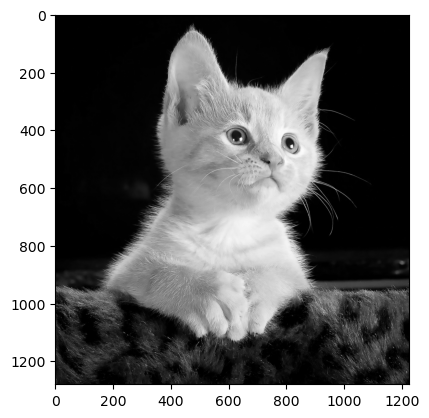

In [4]:
color_image = cv2.imread("cat.jpeg")
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
def convertColorToGrayScale(image, ratio):
    image =  image.astype(np.uint64)
#     img_gray = (image[:,:,0]*ratio[0]+image[:,:,1]*ratio[1]+image[:,:,2]*ratio[2])/3
    img_gray = image @ ratio
    img_gray = img_gray.astype(np.uint8)
    return img_gray
img_gray = convertColorToGrayScale(color_image,ratio_for_grayscale)
print(img_gray.shape)
imgplot = plt.imshow(img_gray,cmap='gray')
plt.show()

In [5]:
color_image = cv2.imread("cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
print(np.sum(gray_image))

5969956


In [6]:
def compute_cosine_similarity(matrix1, matrix2):
    matrix1 = matrix1.flatten()
    matrix1 = matrix1/np.linalg.norm(matrix1)
    matrix2 = matrix2.flatten()
    matrix2 = matrix2/np.linalg.norm(matrix2)
    result = matrix1.dot(matrix2)
    return result

In [7]:
def compute_rms_error(matrix1, matrix2):
    matrix = (matrix1-matrix2)**2
    result = np.mean(matrix)
    result = math.sqrt(result)
    return result

In [8]:
A = np.array([[1,2,2],
               [3,2,2],
               [-2,1,-3]])
B = np.array([[4,2,4],
               [2,-2,5],
               [3,4,-4]])
result = compute_cosine_similarity(A,B)
print(round(result,2))
print(A.shape)
print(A[:,:1])

0.57
(3, 3)
[[ 1]
 [ 3]
 [-2]]


In [9]:
A = np.array([[1,2,2],
[3,2,2],
[-2,1,-3]])
B = np.array([[4,2,4],
[2,-2,5],
[3,4,-4]])
result = compute_rms_error(B,A)
print(round(result,2))

2.87


In [36]:
def evaluate_svd_for_feature_compression_by_metric(gray_image, metric):
    U,S,V_T = compute_svd(gray_image)
    rank_k = len(S)
    S = np.diag(S)
    approx_list = []
    metric_list = []
    k= rank_k
    for i in range(1,k+1,1):
        # compute reconstruction image by using U, S, and V_T
        approx = None
        # ************** Your code here *************************
        approx = U[:,:i]@S[:i,:]@V_T
        approx_list.append(approx)
        if metric == 0:
            metric_list.append(compute_cosine_similarity(gray_image, approx))
        else:
            metric_list.append(compute_rms_error(gray_image, approx))
            
    return metric_list, approx_list, k


In [38]:
color_image = cv2.imread("cat.jpeg")
color_image = cv2.resize(color_image, (300,300))
ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
a, _, k = evaluate_svd_for_feature_compression_by_metric(gray_image,0)
print(k)

300


In [12]:
def draw_metric_information(metric_list, k):
    x_axis = list(range(1,k+1,1))
    plt.xlabel("k")
    plt.ylabel("RMS error")
    plt.plot(x_axis,metric_list, color="r")
    plt.show()
def draw_approx_image(approx_list, k):
    row = 6
    col = 4
    fig = plt.figure(figsize=(25, 25))
    fig_index = 1
    for i in range(0, k, 13):
        # Adds a subplot at the 1st position
        fig.add_subplot(row, col, fig_index)
        # showing image
        plt.imshow(approx_list[i], cmap="gray")
        plt.axis('off')
        plt.title("k =" + str(i+1))
        fig_index = fig_index + 1
    plt.show()



300


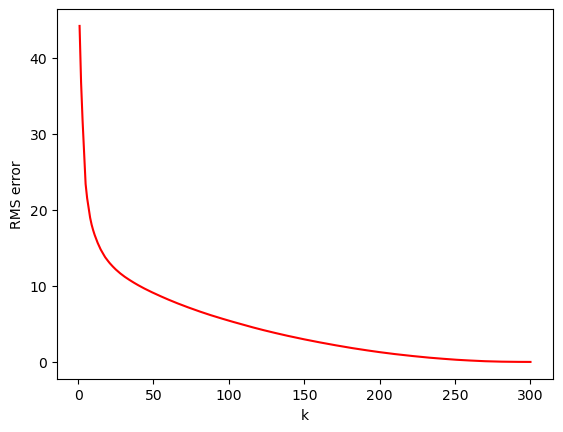

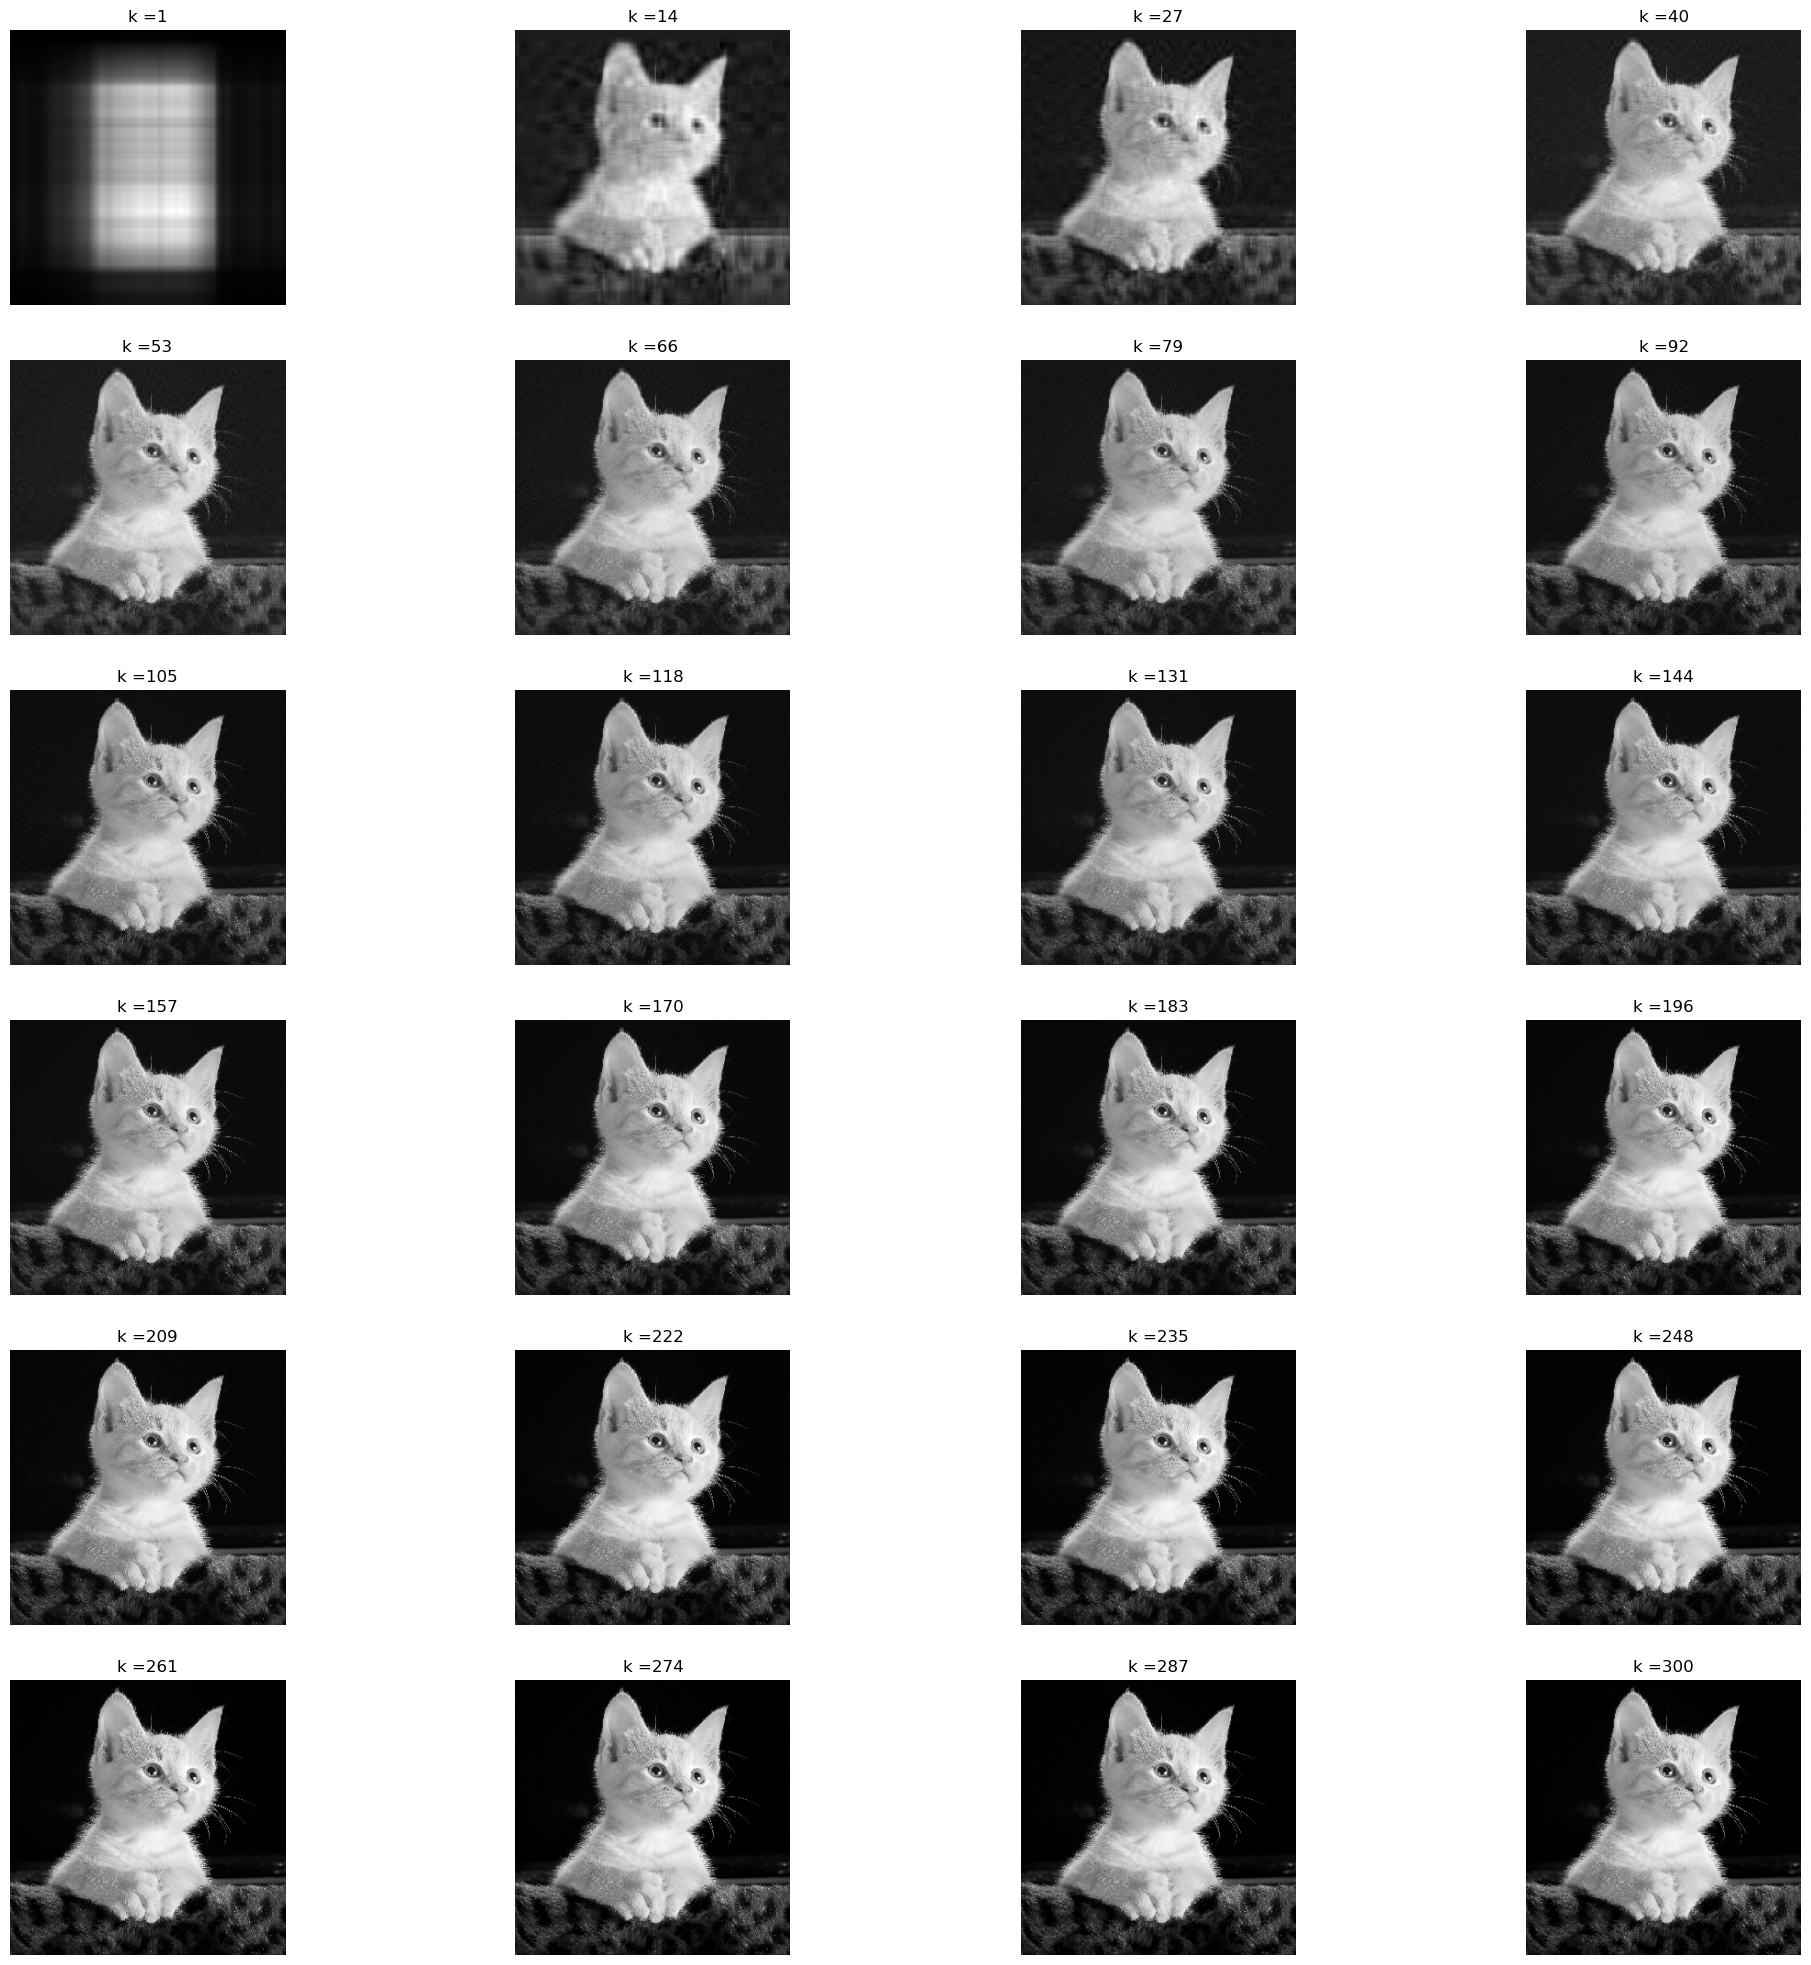

In [40]:
def main_application():
    color_image = cv2.imread("cat.jpeg")
    color_image = cv2.resize(color_image, (300,300))
    ratio_for_grayscale = [0.2126, 0.7152, 0.0722]
    gray_image = convertColorToGrayScale(color_image, ratio_for_grayscale)
    metric_list, approx_list, k = evaluate_svd_for_feature_compression_by_metric(gray_image, 1)
    print(len(approx_list))
    draw_metric_information(metric_list, k)
    draw_approx_image(approx_list, k)

main_application()